# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.577047e+01     1.254442e+01
 * time: 0.0018830299377441406
     1     3.196818e+01     7.705648e+00
 * time: 0.0065631866455078125
     2     2.617056e+01     5.178676e+00
 * time: 0.012440204620361328
     3     2.187672e+01     2.111206e+00
 * time: 0.018316984176635742
     4     2.016396e+01     1.864487e+00
 * time: 0.023527145385742188
     5     1.930086e+01     1.670675e+00
 * time: 0.029093027114868164
     6     1.879469e+01     9.450084e-01
 * time: 0.0345761775970459
     7     1.854444e+01     9.784071e-01
 * time: 0.03983616828918457
     8     1.839852e+01     8.111408e-01
 * time: 0.04508614540100098
     9     1.825477e+01     7.312398e-01
 * time: 0.050039052963256836
    10     1.821587e+01     1.594993e+00
 * time: 0.05404210090637207
    11     1.809056e+01     1.133396e+00
 * time: 0.09192109107971191
    12     1.793709e+01     9.597354e-01
 * time: 0.09535098075866699
    13     1.786033e+01     1.108078e+00


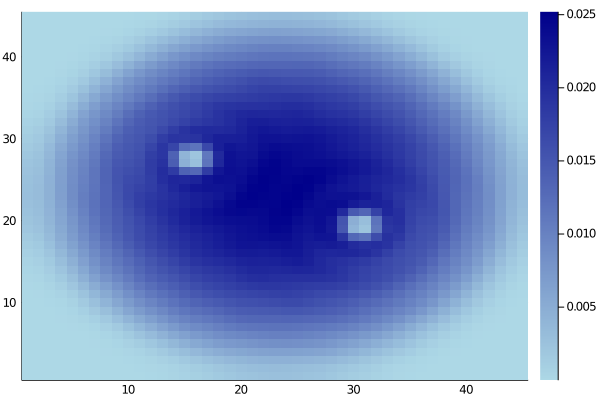

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)